## Task: Train a logistic regression classifier to predict survival of passengers in titanic dataset

You should download the data from GitHub in Day2 assessments (Titanic-Dataset.csv) dataset in the form of a csv

In the dataset, each row represents information about the passengers of titanic, Like their name, gender, class etc(See the dataframe below for more info).

The target column is 'Survived' which tells us whether this particular passenger sirvived or not

Use any of all the other columns as the input features (You can choose to drop the columns you see are not worth keeping).

Your task is to train a logistic regression model which takes the input featues (make sure to not accidentaly feed the 'Survived' column to the model as input) and predicts the whether a passenger with these features would survive or not.

Make sure to put emphasis on code quality and to include a way to judge how good your model is performing on **un-seen data (untrained data)**.

As a bonus, see if you can figure out which feature is most likely to affect the survivability of a passenger.

In [2]:
from IPython.display import clear_output

In [50]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install gdown

clear_output()

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# **reading data**

In [88]:
df=pd.read_csv('Titanic-Dataset.csv')

In [89]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **processing data**


In [67]:

#handle null values in age by taking median, and mode for the Emparked
#df['Age'].fillna(df['Age'].median(), inplace=True)
#df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
#encode categorical colmuns
#df=pd.get_dummies(df, columns=['Sex', 'Embarked'])
#drop irreavelant colmns
#df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)




# **feature and target selctio**n

In [90]:
x=df.drop('Survived', axis=1)
y=df['Survived']

# **explore the data**

Target Distribution:
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


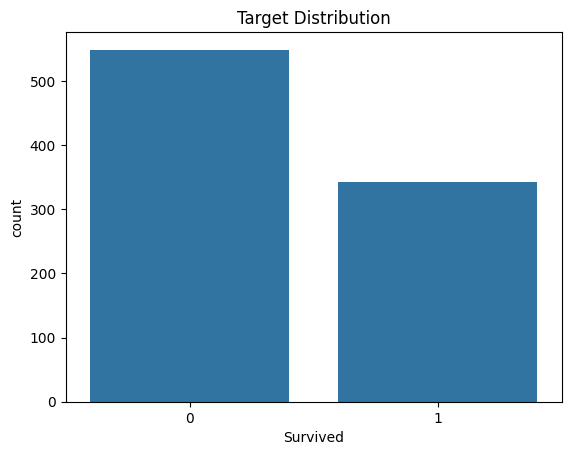

In [91]:
# 1. Is the target imbalanced?
def check_target_imbalance(df, target_column):
    print("Target Distribution:")
    print(df[target_column].value_counts(normalize=True))
    sns.countplot(x=df[target_column])
    plt.title("Target Distribution")
    plt.show()

check_target_imbalance(df, "Survived")

In [97]:
# 2. Do we have missing values?
def check_missing_values(df):
    missing_values = df.isnull().sum()
    print("Missing Values per Column:")
    print(missing_values[missing_values > 0])
    if missing_values.any():
        print("\nHandle Missing Values as needed.")
    else:
        print("\nNo Missing Values Found.")

check_missing_values(df)


age_median = df['Age'].median()
df['Age'].fillna(age_median, inplace=True)

embarked_mode = df['Embarked'].mode()[0]
df['Embarked'].fillna(embarked_mode, inplace=True)


Missing Values per Column:
Cabin    687
dtype: int64

Handle Missing Values as needed.


<ipython-input-97-de5b7292fa96>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(age_median, inplace=True)


In [98]:
# 3. Do we have categorical columns?
def encode_categorical_columns(df):
    categorical_cols = df.select_dtypes(include=["object"]).columns
    print("Categorical Columns:", list(categorical_cols))

label_encoders = encode_categorical_columns(df)


Categorical Columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [99]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    print(f"Encoding column: {col}")
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df

Encoding column: Name
Encoding column: Sex
Encoding column: Ticket
Encoding column: Cabin
Encoding column: Embarked


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,0,3,413,0,28.0,1,2,675,23.4500,147,2
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0


In [101]:
from sklearn.preprocessing import MinMaxScaler
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop("Survived")  ### DON'T SCALE THE TARGET
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.000000,0,1.0,0.121348,1.0,0.271174,0.125,0.000000,0.769118,0.014151,1.000000,1.0
1,0.001124,1,0.0,0.213483,0.0,0.472229,0.125,0.000000,0.876471,0.139136,0.551020,0.0
2,0.002247,1,1.0,0.396629,0.0,0.321438,0.000,0.000000,0.983824,0.015469,1.000000,1.0
3,0.003371,1,0.0,0.305618,0.0,0.434531,0.125,0.000000,0.072059,0.103644,0.374150,1.0
4,0.004494,0,1.0,0.016854,1.0,0.434531,0.000,0.000000,0.694118,0.015713,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.995506,0,0.5,0.615730,1.0,0.334004,0.000,0.000000,0.148529,0.025374,1.000000,1.0
887,0.996629,1,0.0,0.340449,0.0,0.233476,0.000,0.000000,0.020588,0.058556,0.204082,1.0
888,0.997753,0,1.0,0.464045,0.0,0.346569,0.125,0.333333,0.992647,0.045771,1.000000,1.0
889,0.998876,1,0.0,0.091011,1.0,0.321438,0.000,0.000000,0.011765,0.058556,0.408163,0.0


# **feature and target selctio**n

In [102]:
X=df.drop('Survived', axis=1)
y=df['Survived']

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define classification models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(kernel='rbf'),
    "Decision Tree Classifier": DecisionTreeClassifier(max_depth=5),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100),
    "XGBoost Classifier": XGBClassifier(verbosity=0),
    #"CatBoost Classifier": CatBoostClassifier(verbose=0)
}


for model_name, model in models.items():
    scores_accuracy = []
    scores_precision = []
    scores_recall = []
    scores_f1 = []

    # Stratified 5-Fold Cross-Validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for train_index, test_index in skf.split(X, y):
        # Split data into training and testing sets
        X_Train, X_Test = X.loc[train_index, :], X.loc[test_index, :]
        y_Train, y_Test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model.fit(X_Train, y_Train)
        # Predict on the test set
        y_pred = model.predict(X_Test)

        # Calculate metrics
        scores_accuracy.append(accuracy_score(y_Test, y_pred))
        scores_precision.append(precision_score(y_Test, y_pred, average='weighted'))
        scores_recall.append(recall_score(y_Test, y_pred, average='weighted'))
        scores_f1.append(f1_score(y_Test, y_pred, average='weighted'))

    # Print the results
    print(f"{model_name} Accuracy: {np.mean(scores_accuracy):.4f}")
    print(f"{model_name} Precision: {np.mean(scores_precision):.4f}")
    print(f"{model_name} Recall: {np.mean(scores_recall):.4f}")
    print(f"{model_name} F1-Score: {np.mean(scores_f1):.4f}")
    print("\n")


Logistic Regression Accuracy: 0.8002
Logistic Regression Precision: 0.7991
Logistic Regression Recall: 0.8002
Logistic Regression F1-Score: 0.7984


Support Vector Machine Accuracy: 0.8025
Support Vector Machine Precision: 0.8068
Support Vector Machine Recall: 0.8025
Support Vector Machine F1-Score: 0.7949


Decision Tree Classifier Accuracy: 0.7924
Decision Tree Classifier Precision: 0.7911
Decision Tree Classifier Recall: 0.7924
Decision Tree Classifier F1-Score: 0.7886


Random Forest Classifier Accuracy: 0.8384
Random Forest Classifier Precision: 0.8387
Random Forest Classifier Recall: 0.8384
Random Forest Classifier F1-Score: 0.8364


XGBoost Classifier Accuracy: 0.8193
XGBoost Classifier Precision: 0.8184
XGBoost Classifier Recall: 0.8193
XGBoost Classifier F1-Score: 0.8175




# **Baseline accuracy**

In [105]:
# Calculate the majority class baseline
majority_class = y.value_counts().idxmax()
baseline_pred = [majority_class] * len(y)

# Evaluate the baseline
baseline_accuracy = accuracy_score(y, baseline_pred)
baseline_precision = precision_score(y, baseline_pred, average='weighted')
baseline_recall = recall_score(y, baseline_pred, average='weighted')
baseline_f1 = f1_score(y, baseline_pred, average='weighted')

print(f"Baseline Accuracy (majority class): {baseline_accuracy:.4f}")
print(f"Baseline Precision (majority class): {baseline_precision:.4f}")
print(f"Baseline Recall (majority class): {baseline_recall:.4f}")
print(f"Baseline F1-Score (majority class): {baseline_f1:.4f}")


Baseline Accuracy (majority class): 0.6162
Baseline Precision (majority class): 0.3797
Baseline Recall (majority class): 0.6162
Baseline F1-Score (majority class): 0.4698


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


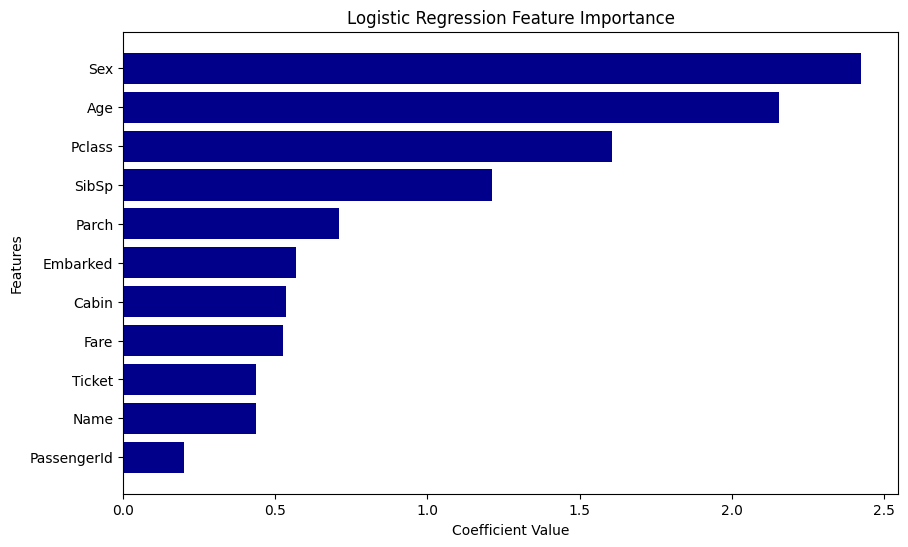

In [106]:
# Retrieve Logistic Regression coefficients and sort by absolute importance
logistic_importance = list(zip(X.columns, models["Logistic Regression"].coef_[0]))
sorted_logistic_importance = sorted(logistic_importance, key=lambda x: abs(x[1]), reverse=True)

# Extract sorted features and their coefficients
features, coefficients = zip(*sorted_logistic_importance)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, np.abs(coefficients), color='darkblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Logistic Regression Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()
